# Test de détection de marker ArUco
https://pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/

## Génération de code ArUco
https://pyimagesearch.com/2020/12/14/generating-aruco-markers-with-opencv-and-python/

In [2]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

### Tout les dictionnaires des ArUco Marker

In [4]:
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [5]:
arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT["DICT_4X4_1000"])

### Génération d'un ArUco d'id

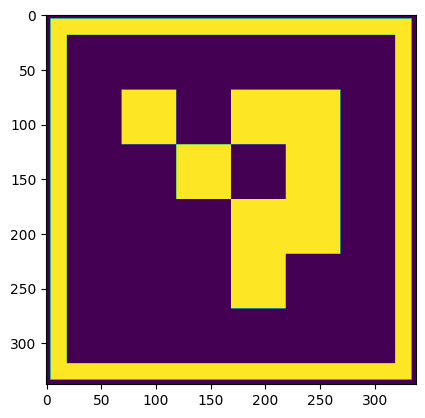

In [12]:
tag = np.zeros((300, 300, 1), dtype="uint8")
id = 0
cv2.aruco.generateImageMarker(arucoDict, id, 300, tag, 1)

name = "../aruco_markers/aruco_bn" +  str(id)  + ".png"

# # add white border
tag = cv2.copyMakeBorder(tag, 15, 15, 15, 15, cv2.BORDER_CONSTANT, value=[255, 255, 255])
tag = cv2.copyMakeBorder(
    tag, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=[0, 0, 0]
)

cv2.imwrite(name, tag) 
plt.imshow(tag)

### Génération d'un ArUco d'id 2

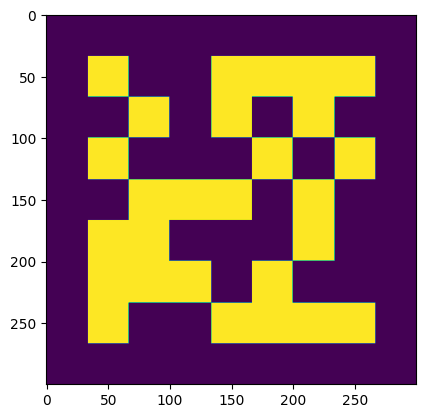

In [49]:
tag = np.zeros((300, 300, 1), dtype="uint8")
cv2.aruco.generateImageMarker(arucoDict, 2, 300, tag, 1)

cv2.imwrite("img/arucoMaker2.png", tag) 
plt.imshow(tag)

## Détection de marker ArUco

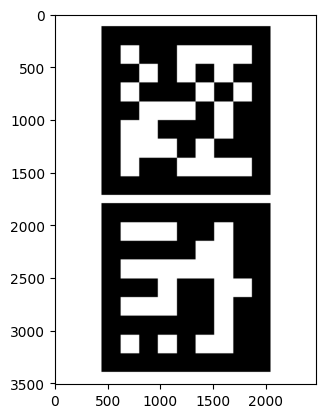

In [46]:
image_detect = cv2.imread("./img/ArU.png")

plt.imshow(image_detect)

In [50]:
arucoParams = cv2.aruco.DetectorParameters()
arucoDetector = cv2.aruco.ArucoDetector(arucoDict, arucoParams)

In [51]:
(corners, ids, rejected) = arucoDetector.detectMarkers (image_detect)

print("corners :\n", corners, "\n")
print("ids :\n", ids, "\n")

corners :
 (array([[[ 440., 1793.],
        [2039., 1793.],
        [2039., 3392.],
        [ 440., 3392.]]], dtype=float32), array([[[ 440.,  115.],
        [2039.,  115.],
        [2039., 1714.],
        [ 440., 1714.]]], dtype=float32)) 

ids :
 [[1]
 [2]] 



### Visualisation des markers

Il y a  2 marker aruco 

[INFO] ArUco marker ID: 1
[INFO] ArUco marker ID: 2


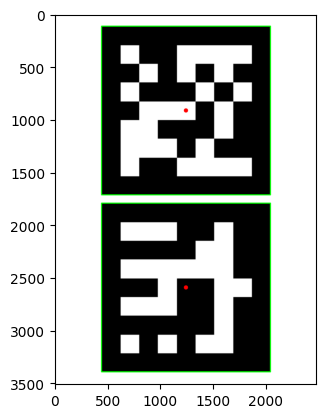

In [52]:
print("Il y a ", len(corners), "marker aruco \n")
if len(corners) > 0:
    # flatten the ArUco IDs list
    ids = ids.flatten()
    for (markerCorner, markerID) in zip(corners, ids):
        # extract the marker corners (which are always returned in
        # top-left, top-right, bottom-right, and bottom-left order)
        corners = markerCorner.reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corners
        
        # convert each of the (x, y)-coordinate pairs to integers
        topRight = (int(topRight[0]), int(topRight[1]))
        bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
        bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
        topLeft = (int(topLeft[0]), int(topLeft[1]))

        # draw the bounding box of the ArUCo detection
        cv2.line(image_detect, topLeft, topRight, (0, 255, 0), 10)
        cv2.line(image_detect, topRight, bottomRight, (0, 255, 0), 10)
        cv2.line(image_detect, bottomRight, bottomLeft, (0, 255, 0), 10)
        cv2.line(image_detect, bottomLeft, topLeft, (0, 255, 0), 10)
        
        # compute and draw the center (x, y)-coordinates of the ArUco
        # marker
        cX = int((topLeft[0] + bottomRight[0]) / 2.0)
        cY = int((topLeft[1] + bottomRight[1]) / 2.0)
        cv2.circle(image_detect, (cX, cY), 20, (255, 0, 0), -1)
        # draw the ArUco marker ID on the image
        print("[INFO] ArUco marker ID: {}".format(markerID))

plt.imshow(image_detect)

### Visualisation des rejected

Il y a  5 rejected aruco 



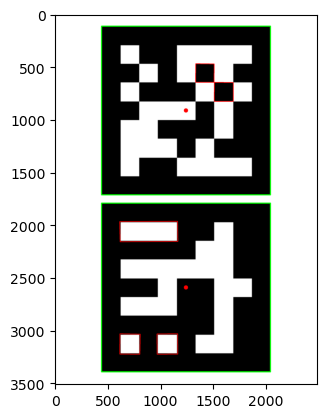

In [152]:
print("Il y a ", len(rejected), "rejected aruco \n")
if len(rejected) > 0:
    for rejectedCorner in rejected:
        corners = rejectedCorner.reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corners
        
        # convert each of the (x, y)-coordinate pairs to integers
        topRight = (int(topRight[0]), int(topRight[1]))
        bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
        bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
        topLeft = (int(topLeft[0]), int(topLeft[1]))
        
        # draw the bounding box of the Rejected detection
        cv2.line(image_detect, topLeft, topRight, (255, 0, 0), 5)
        cv2.line(image_detect, topRight, bottomRight, (255, 0, 0), 5)
        cv2.line(image_detect, bottomRight, bottomLeft, (255, 0, 0), 5)
        cv2.line(image_detect, bottomLeft, topLeft, (255, 0, 0), 5)
        
plt.imshow(image_detect)
        